In [1]:
from manim import *

config.media_width = "100%"
_RV = "-v WARNING -qm --progress_bar None --disable_caching Example"
_RI = "-v WARNING -s --progress_bar None --disable_caching Example"

Manim Community v0.17.2

In [2]:
class Example(Scene):
    
    def construct(self):
        
        q = 1 # 1.6e-19 # con este valor ya no se alcanzan a ver las flechas
        
        # posicion de la carga
        x_pos = -3
        y_pos = 2
        z_pos = 0
        
        # cuando la carga puntual está en el origen
        func = lambda p: np.array([
            (p[0] - x_pos)*q / (((p[0] - x_pos)**2 + (p[1] - y_pos)**2 + (p[2] - z_pos)**2 + 0.000001)**(3/2)),  # x
            (p[1] - y_pos)*q / (((p[0] - x_pos)**2 + (p[1] - y_pos)**2 + (p[2] - z_pos)**2 + 0.000001)**(3/2)),  # y
            (p[2] - z_pos)*q / (((p[0] - x_pos)**2 + (p[1] - y_pos)**2 + (p[2] - z_pos)**2 + 0.000001)**(3/2))   # z
        ])
        
        x_pos_1 = 3
        y_pos_1 = -2
        z_pos_1 = 0
        
        func_1 = lambda p: np.array([
            (p[0] - x_pos_1)*q / (((p[0] - x_pos_1)**2 + (p[1] - y_pos_1)**2 + (p[2] - z_pos_1)**2 + 0.000001)**(3/2)),  # x
            (p[1] - y_pos_1)*q / (((p[0] - x_pos_1)**2 + (p[1] - y_pos_1)**2 + (p[2] - z_pos_1)**2 + 0.000001)**(3/2)),  # y
            (p[2] - z_pos_1)*q / (((p[0] - x_pos_1)**2 + (p[1] - y_pos_1)**2 + (p[2] - z_pos_1)**2 + 0.000001)**(3/2))   # z
        ])
        
        func1 = lambda p: np.array([
            p[0],  # x
            p[1],  # y
            0      # z
        ])
        
        func2 = lambda p: p
        
        func3 = lambda p: func(p) + func_1(p)
        
        # Semi-Normalized
        vector_field_norm = ArrowVectorField(func3)
        # Not normalized
        vector_field_not_norm = ArrowVectorField(func3, length_func=linear)
        self.play(*map(GrowArrow, vector_field_norm))
        self.wait(3)
        self.play(
            ReplacementTransform(
                vector_field_norm,
                vector_field_not_norm
            )
        )
        self.wait(3)


%manim $_RV

In [3]:
x_pos = -3
y_pos = 2
z_pos = 0

q = 1
        
func = lambda p: np.array([
            (p[0] - x_pos)*q / (((p[0] - x_pos)**2 + (p[1] - y_pos)**2 + (p[2] - z_pos)**2 + 0.000001)**(3/2)),  # x
            (p[1] - y_pos)*q / (((p[0] - x_pos)**2 + (p[1] - y_pos)**2 + (p[2] - z_pos)**2 + 0.000001)**(3/2)),  # y
            (p[2] - z_pos)*q / (((p[0] - x_pos)**2 + (p[1] - y_pos)**2 + (p[2] - z_pos)**2 + 0.000001)**(3/2))   # z
        ])
func1 = lambda p: np.array([
    p[0],  # x
    p[1],  # y
    0        # z
])

In [4]:
point = np.array([2,6,4])
func(point)+func1(point)

array([2.0116187 , 6.00929496, 0.00929496])

## Creación de la clase `CargaPuntual2D`

In [5]:
class CargaPuntual2D(VMobject):

    def __init__(self, pos=np.array([0, 0, 0]), q=1.6e-19, q_draw=1):
        
        super().__init__()
        
        self.pos = pos
        self.q = q
        self.q_draw = q_draw
        
        self.create()
        
        
    def create(self):
        
        #carga = Dot(color=RED if self.q_draw > 0 else BLUE).scale(2).move_to(self.pos)
        carga = Circle(radius=0.15, color=RED_B if self.q_draw > 0 else BLUE_B)\
                .set_fill(RED_E if self.q_draw > 0 else BLUE_E, 1).move_to(self.pos)
        
        self.add(carga)
        
        
    def campo(self, p, q):
        
        return np.array([
            (p[0] - self.pos[0])*q / 
                    (((p[0] - self.pos[0])**2 + (p[1] - self.pos[1])**2 + (p[2] - self.pos[2])**2 + 1e-18)**(3/2)), # x
            (p[1] - self.pos[1])*q / 
                    (((p[0] - self.pos[0])**2 + (p[1] - self.pos[1])**2 + (p[2] - self.pos[2])**2 + 1e-18)**(3/2)), # y
            (p[2] - self.pos[2])*q / 
                    (((p[0] - self.pos[0])**2 + (p[1] - self.pos[1])**2 + (p[2] - self.pos[2])**2 + 1e-18)**(3/2))  # z
        ])
    
    
    def campo_draw(self, p):
        return self.campo(p, self.q_draw)
    
    
    def campo_real(self, p):
        return self.campo(p, self.q)
        

In [6]:
class Example(Scene):
    
    def construct(self):
        
        fields = [
            CargaPuntual2D(q_draw=-1),
            CargaPuntual2D(pos=np.array([5, 2, 0])),
            CargaPuntual2D(pos=np.array([-3, -3, 0]), q_draw=-1),
            CargaPuntual2D(pos=np.array([-4, 1, 0]))
        ]
        
        for field in fields:
            self.add(field)
            field.set_z_index(10)
        
        def func_e_field(p):
            total_field = np.array([0., 0., 0.])
            for field in fields:
                total_field += field.campo_draw(p)
            return total_field
        
        # Semi-Normalized
        vector_field_norm = ArrowVectorField(func_e_field)
        # Not normalized
        vector_field_not_norm = ArrowVectorField(func_e_field, length_func=linear)
        self.play(*map(GrowArrow, vector_field_norm))
        self.wait(3)
        self.play(
            ReplacementTransform(
                vector_field_norm,
                vector_field_not_norm
            )
        )
        self.wait(3)


%manim $_RV

In [7]:
class Example(Scene):
    
    def construct(self):
        
        fields = [
            CargaPuntual2D(pos=np.array([0.1, 0.1, 0])),
            CargaPuntual2D(pos=np.array([5, 2, 0])),
            CargaPuntual2D(pos=np.array([-3.1, -3.1, 0])),
            CargaPuntual2D(pos=np.array([-4, 1, 0]))
        ]
        
        for field in fields:
            self.add(field)
            field.set_z_index(10)
        
        def func_e_field(p):
            total_field = np.array([0., 0., 0.])
            for field in fields:
                total_field += field.campo_draw(p)
            return total_field
        
        stream_lines = StreamLines(func_e_field, stroke_width=3)
        self.add(stream_lines)
        stream_lines.start_animation(warm_up=False, flow_speed=0.75)
        self.wait(5)


%manim $_RV

## Agregar campo a la clase `Placas2D`

In [8]:
ScreenRectangle().height

4.0

In [9]:
class Placas2D(VMobject):

    def __init__(self, ancho=0.5, alto=7.5, E=500e3, E_draw=1):
        
        super().__init__()
        
        self.ancho = ancho
        self.alto = alto
        self.E = E
        self.E_draw = E_draw
        self.create()
        
        
    def create(self):
        
        placa_positiva = Rectangle(width=self.ancho, height=self.alto, color=RED_B)\
                         .set_fill(RED_E, 1).move_to(LEFT * (7.0 - self.ancho))
        placa_negativa = Rectangle(width=self.ancho, height=self.alto, color=BLUE)\
                         .set_fill(BLUE_E, 1).move_to(RIGHT * (7.0 - self.ancho))
        
        self.add(placa_positiva, placa_negativa)
        
        
    def campo(self, p, E_mag):
        
        E = 0
        
        height_half_screen = ScreenRectangle().height
        
        # hay campo solo donde están las placas
        if p[0] > (LEFT[0] * (7.0 - self.ancho)) \
            and p[0] < (RIGHT[0] * (7.0 - self.ancho)) \
            and p[1] > -height_half_screen + (height_half_screen - self.alto / 2) \
            and p[1] < height_half_screen - (height_half_screen - self.alto / 2):
                E = E_mag
        
        return np.array([
            E, # x
            0, # y
            0  # z
        ])

    
    def campo_draw(self, p):
        return self.campo(p, self.E_draw)
    
    
    def campo_real(self, p):
        return self.campo(p, self.E)

In [10]:
class Example(Scene):
    
    def construct(self):
        
        fields = [
            Placas2D()
        ]
        
        for field in fields:
            self.add(field)
            field.set_z_index(10)
        
        def func_e_field(p):
            total_field = np.array([0., 0., 0.])
            for field in fields:
                total_field += field.campo_draw(p)
            return total_field
        
        # Semi-Normalized
        vector_field_norm = ArrowVectorField(func_e_field)
        # Not normalized
        vector_field_not_norm = ArrowVectorField(func_e_field, length_func=linear)
        self.play(*map(GrowArrow, vector_field_norm))
        self.wait(3)
        self.play(
            ReplacementTransform(
                vector_field_norm,
                vector_field_not_norm
            )
        )
        self.wait(3)


%manim $_RV

In [11]:
class Example(Scene):
    
    def construct(self):
        
        fields = [
            Placas2D(),
            CargaPuntual2D(pos=np.array([1.25, 1.25, 0]), q_draw=1)
        ]
        
        for field in fields:
            self.add(field)
            field.set_z_index(10)
        
        def func_e_field(p):
            total_field = np.array([0., 0., 0.])
            for field in fields:
                total_field += field.campo_draw(p)
            return total_field
        
        # Semi-Normalized
        vector_field_norm = ArrowVectorField(func_e_field)
        # Not normalized
        vector_field_not_norm = ArrowVectorField(func_e_field, length_func=linear)
        self.play(*map(GrowArrow, vector_field_norm))
        self.wait(3)
        self.play(
            ReplacementTransform(
                vector_field_norm,
                vector_field_not_norm
            )
        )
        self.wait(3)


%manim $_RV

## Agregar dipolo a campos definidos por generadores de campo

In [12]:
from scipy import integrate

In [162]:
class DipoloElectrico2D(VMobject):
    

    def __init__(self, angle, pos=np.array([0, 0, 0]), 
                 t_start=0, t_end=30, ele=140e-9, q=1.6e-19, m=1e-7, E=np.array([500e3, 0, 0]), 
                 longitud_escala=[40e-9, 140e-9], fps=30):
        
        super().__init__()
        
        self.angle = angle  # con respecto al eje +x
        self.pos = pos
        self.t_start = t_start
        self.t_end = t_end
        self.ele = ele
        self.q1 = q
        self.q2 = -q
        self.m = m
        self.E = E
        self.longitud_escala = longitud_escala
        self.fps = int(fps)
        
        self.create()
        self.calculate_dynamics()
        
    def create(self):
        
        longiud2 = self.escalar([self.ele], self.longitud_escala, [0.15, 0.8])[0]
        stroke_w = self.escalar([self.ele], self.longitud_escala, [4, 9])[0]
        scaledot = self.escalar([self.ele], self.longitud_escala, [1, 3])[0]
        
        linea = Line(LEFT * longiud2, RIGHT * longiud2, stroke_width=stroke_w) # 0.15 - 0.8, 4 - 9
        
        polo_positivo = Dot(color=RED).scale(scaledot).move_to(linea.get_end())    # 1 - 3
        polo_negativo = Dot(color=BLUE).scale(scaledot).move_to(linea.get_start()) # 1 - 3
        
        linea.add(polo_positivo, polo_negativo)
        
        self.add(linea)
        
        self.move_to(self.pos)

    def calculate_dynamics(self):
        
        theta = self.angle  # angulo inicial
        omega = 0.0         # velocidad angular inicial
        
        # asumiendo que el centro de ele está en el origen
        r_pos = np.array([(self.ele/2)*np.cos(theta), (self.ele/2)*np.sin(theta), 0])    # carga positva
        r_neg = np.array([-(self.ele/2)*np.cos(theta), -(self.ele/2)*np.sin(theta), 0])  # carga negativa
        
        #l = r_neg - r_pos
        l = r_pos - r_neg
        p = l * self.q1
        
        I = self.momento_inercia_dos_masas(self.m, l)
        
        print("r_pos =", r_pos)
        print("r_neg =", r_neg)
        print("l =", l)
        print("p =", p)
        print("I =", I)
        
        self.solution = integrate.solve_ivp(self.angulo_dipolo, 
                                            [self.t_start, self.t_end], 
                                            [theta, omega],
                                            method='RK45', 
                                            t_eval=np.linspace(self.t_start, self.t_end, self.t_end * self.fps + 2),
                                            args=(I, p, self.E)
                                           )
        
    def angulo_dipolo(self, t, theta, I, p, E):
    
        # componentes
        x, v = theta    # x: theta, v: omega
        
        r_pos = np.array([(self.ele/2)*np.cos(x), (self.ele/2)*np.sin(x), 0])    # carga positva
        #r_neg = np.array([-(self.ele/2)*np.cos(x), -(self.ele/2)*np.sin(x), 0])  # carga negativa
        
        #l = r_pos - r_neg
        #p = l * self.q1
        
        #I = self.momento_inercia_barra(self.m, l)
        
        #p_mag = np.linalg.norm(p)
        E_mag = np.linalg.norm(E)
        r_pos_mag = np.linalg.norm(r_pos)
        #I_mag = np.linalg.norm(I)
        
        #p_uni = p / p_mag
        E_uni = E / E_mag
        r_pos_uni = r_pos / r_pos_mag
        
        angle = np.arccos(np.clip(np.dot(r_pos_uni, E_uni), -1.0, 1.0))
        
        print('angle =', angle)
        print('x     =', x)
        
        tau = np.linalg.norm(p) * np.linalg.norm(E) * np.sin(x)
        #tau = p[0] * E[0] * np.sin(x)
        
        #ax = tau / I_mag if I_mag != 0 else 0
        a = -tau / I if I != 0 else 0

        return [v, a]  # velocidad (omega, primera derivada) y aceleración (alpha, segunda derivada)


    def momento_inercia_barra(self, m, l):

        #return np.array([m * l[0]**2, m * l[1]**2, m * l[2]**2]) / 12
        return m * np.linalg.norm(l)**2 / 12
    
        
    def momento_inercia_dos_masas(self, m, l):
        
        return m * np.linalg.norm(l)**2 / 4
    
    
    def escalar(self, values, actual_bounds, desired_bounds):
        return [
            desired_bounds[0] + (x - actual_bounds[0]) * (desired_bounds[1] - desired_bounds[0])
            / (actual_bounds[1] - actual_bounds[0]) 
            for x in values
        ]

In [163]:
fields = [
    Placas2D(ancho=0.4, E=500e2)
]

def e_field_real(p):
    total_field = np.array([0., 0., 0.])
    for field in fields:
        total_field += field.campo_real(p)
        print('total_field =', total_field)
    return total_field

dipolo = DipoloElectrico2D(2*PI/3, pos=np.array([1, 1, 0]), t_end=60,
                           fps=30, 
                           E=e_field_real(np.array([1, 1, 0])), ele=140e-9)

total_field = [50000.     0.     0.]
r_pos = [-3.50000000e-08  6.06217783e-08  0.00000000e+00]
r_neg = [ 3.50000000e-08 -6.06217783e-08  0.00000000e+00]
l = [-7.00000000e-08  1.21243557e-07  0.00000000e+00]
p = [-1.1200000e-26  1.9398969e-26  0.0000000e+00]
I = 4.900000000000001e-22
angle = 2.0943951023931953
x     = 2.0943951023931953
angle = 2.0943951023931953
x     = 2.0943951023931953
angle = 2.0943951023931953
x     = 2.0943951023931953
angle = 2.0943950796817217
x     = 2.0943950796817217
angle = 2.0943949408893814
x     = 2.0943949408893814
angle = 2.0943949030057776
x     = 2.0943949030057776
angle = 2.0943948500434937
x     = 2.0943948500434937
angle = 2.09439485004348
x     = 2.09439485004348
angle = 2.094393840644595
x     = 2.094393840644595
angle = 2.09439106479744
x     = 2.09439106479744
angle = 2.094374662040679
x     = 2.094374662040679
angle = 2.0943704250979733
x     = 2.0943704250979733
angle = 2.094364568093193
x     = 2.094364568093193
angle = 2.0943645679886895
x

In [33]:
#dipolo.solution.y[0]

In [26]:
import matplotlib.pyplot as plt

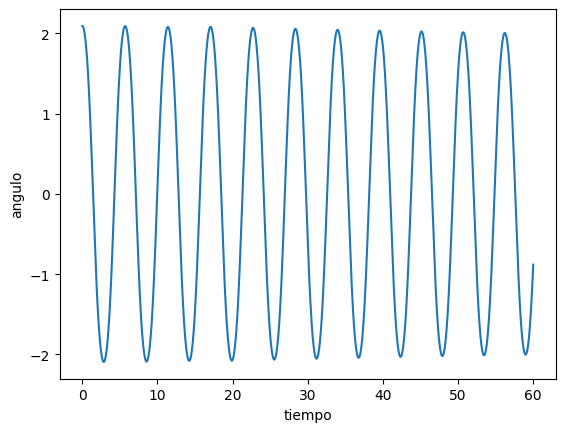

In [161]:
plt.plot(dipolo.solution.t, dipolo.solution.y[0])
plt.xlabel('tiempo')
plt.ylabel('angulo')
plt.show()

In [146]:
TOTAL_TIME = 10

            
class Example(Scene):

    def construct(self):
        
        fields = [
            Placas2D(ancho=0.4, E=500e2)
        ]
        
        for field in fields:
            self.add(field)
            field.set_z_index(10)
        
        def func_e_field(p):
            total_field = np.array([0., 0., 0.])
            for field in fields:
                total_field += field.campo_draw(p)
            return total_field
        
        def e_field_real(p):
            total_field = np.array([0., 0., 0.])
            for field in fields:
                total_field += field.campo_real(p)
                print('total_field =', total_field)
            return total_field
        
        vector_field = ArrowVectorField(func_e_field)
        vector_field._alpha = 1
        #self.play(*map(GrowArrow, vector_field))
        #self.play(*map(FadeOut, vector_field))
        
        def show_field(mob, dt):
            # valor de alpha que quiero quitar en 3 segundos, el dt se usa para que el calculo considere fps y TOTAL_TIME
            mob._alpha = mob._alpha - (0.65*dt/3) if mob._alpha > 0.35 else 0.35
            for subm in mob.submobjects:
                subm.set_opacity(mob._alpha)
            
        #self.play(UpdateFromAlphaFunc(vector_field, show_field))
        vector_field.add_updater(show_field)
        self.add(vector_field)
            
        #vector_field.add_updater(show_field)
        #self.add(vector_field)
        
        initial_angle = 2*PI/3

        dipolo = DipoloElectrico2D(initial_angle, pos=np.array([1, 1, 0]), t_end=TOTAL_TIME, fps=self.camera.frame_rate, 
                                   E=e_field_real(np.array([1, 1, 0])), ele=140e-9)
                                   #E=np.array([500e2, 0, 0]), ele=40e-9)
        dipolo.save_state()
        dipolo._counter = 0
        
        def dipolo_dinamica(mob, dt):
            mob.restore()
            mob.rotate(mob.solution.y[0][mob._counter])
            mob._counter += 1
            
        dipolo.add_updater(dipolo_dinamica)
        self.add(dipolo)
        
        
        self.wait(TOTAL_TIME)
        

%manim $_RV

total_field = [50000.     0.     0.]
r_pos = [-3.50000000e-08  6.06217783e-08  0.00000000e+00]
r_neg = [ 3.50000000e-08 -6.06217783e-08  0.00000000e+00]
l = [-7.00000000e-08  1.21243557e-07  0.00000000e+00]
p = [-1.1200000e-26  1.9398969e-26  0.0000000e+00]
I = 9.800000000000001e-22


In [ ]:
fields = [
    CargaPuntual2D(pos=np.array([-1, -1, 0]), q=100e1)
]

def e_field_real(p):
    total_field = np.array([0., 0., 0.])
    for field in fields:
        total_field += field.campo_real(p)
        print('total_field =', total_field)
    return total_field

dipolo = DipoloElectrico2D(PI/8, pos=np.array([0.5, 1.5, 0]), t_end=TOTAL_TIME,
                           fps=30, 
                           E=e_field_real(np.array([0.5, 1.5, 0])), ele=70e-9)

In [ ]:
np.cross(np.array([-7.91959595e-27, -7.91959595e-27, 0.00000000e+00]), 
         np.array([199745.41093069, 332909.01821781, 0.]))

In [ ]:
np.linalg.norm(np.array([-7.91959595e-27, -7.91959595e-27, 0.00000000e+00]))

In [ ]:
dipolo.solution.y[0][180:240]

In [ ]:
TOTAL_TIME = 30

            
class Example(Scene):

    def construct(self):
        
        fields = [
            CargaPuntual2D(pos=np.array([-1, -1, 0]), q=100e1)
        ]
        
        for field in fields:
            self.add(field)
            field.set_z_index(10)
        
        def func_e_field(p):
            total_field = np.array([0., 0., 0.])
            for field in fields:
                total_field += field.campo_draw(p)
            return total_field
        
        def e_field_real(p):
            total_field = np.array([0., 0., 0.])
            for field in fields:
                total_field += field.campo_real(p)
                print('total_field =', total_field)
            return total_field
        
        vector_field = ArrowVectorField(func_e_field)
        vector_field._alpha = 1
        
        def show_field(mob, dt):
            # valor de alpha que quiero quitar en 3 segundos, el dt se usa para que el calculo considere fps y TOTAL_TIME
            mob._alpha = mob._alpha - (0.65*dt/3) if mob._alpha > 0.35 else 0.35
            for subm in mob.submobjects:
                subm.set_opacity(mob._alpha)
            
        vector_field.add_updater(show_field)
        self.add(vector_field)
        
        
        initial_angle = PI/4

        dipolo = DipoloElectrico2D(initial_angle, pos=np.array([0.5, 1.5, 0]), t_end=TOTAL_TIME,
                                   fps=self.camera.frame_rate, 
                                   E=e_field_real(np.array([0.5, 1.5, 0])), ele=70e-9)
                                   #E=np.array([500e2, 0, 0]), ele=40e-9)
        dipolo.save_state()
        dipolo._counter = 0
        
        def dipolo_dinamica(mob, dt):
            mob.restore()
            mob.rotate(mob.solution.y[0][mob._counter])
            mob._counter += 1
            
        dipolo.add_updater(dipolo_dinamica)
        self.add(dipolo)
        
        
        self.wait(TOTAL_TIME)
        

%manim $_RV